In [20]:
import numpy as np
import os
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib.image import imread
import tensorflow as tf
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

In [15]:
base_dir = "dataset_aero_heli"
train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")
classes = ["heli", "aero"]

# Visualizing the data

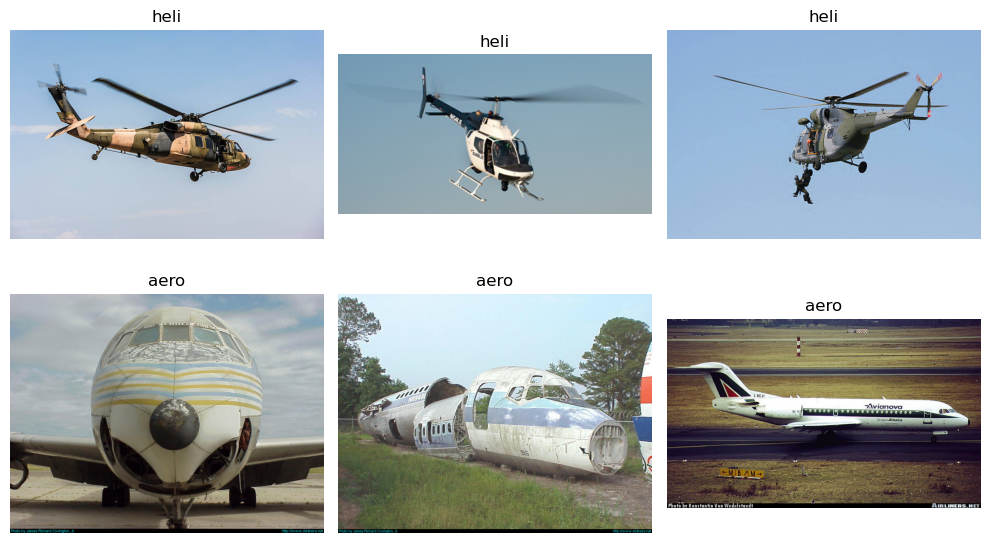

In [ ]:
# Function to display sample images
def display_sample_images(train_dir, classes, num_images=3):
    plt.figure(figsize=(10, 6))
    
    for class_index, class_name in enumerate(classes):
        class_folder = os.path.join(train_dir, class_name)
        image_files = os.listdir(class_folder)[:num_images]  # Taking the first few images
        
        for i, image_file in enumerate(image_files):
            img_path = os.path.join(class_folder, image_file)
            img = load_img(img_path)  # Loading the image
            
            # Displaying the image
            plt.subplot(len(classes), num_images, class_index * num_images + i + 1)
            plt.imshow(img)
            plt.title(f"{class_name}")
            plt.axis("off")
    
    plt.tight_layout()
    plt.show()

display_sample_images(train_dir, classes)


# Preprocessing the data

In [17]:
# Data augmentation function
def augment_image(image_array):
    # Setting up a random transformation using ImageDataGenerator
    datagen = ImageDataGenerator(
        brightness_range=[0.9, 1.1],
        horizontal_flip=True,
    )
    image_array = np.expand_dims(image_array, axis=0)
    # Generating augmented image
    augmented_iter = datagen.flow(image_array, batch_size=1)
    augmented_image = next(augmented_iter)[0]
    return augmented_image

In [21]:
# Defining classes and label map
classes = ["heli", "aero"]
label_map = {class_name: idx for idx, class_name in enumerate(classes)}

# Target size for VGG-16
target_size = (224, 224)

# Function to load images with optional augmentation
def load_images_from_folder(folder, label_map, image_size=target_size, augment=False, augment_factor=2):
    images, labels = [], []
    for class_name, label in label_map.items():
        class_folder = os.path.join(folder, class_name)
        for img_file in tqdm(os.listdir(class_folder), desc=f"Processing {class_name} images"):
            img_path = os.path.join(class_folder, img_file)
            img = load_img(img_path, target_size=image_size) #Loading image and resizing
            img_array = img_to_array(img) / 255.0  # Normalizing to [0, 1]
            
            # Original image
            images.append(img_array)
            labels.append(label)
            
            # Augmentation
            if augment:
                for _ in range(augment_factor):  # Augmenting each image `augment_factor` times
                    augmented_image = augment_image(img_array)
                    images.append(augmented_image)
                    labels.append(label)
    
    return np.array(images), np.array(labels)

# Augmented training data
X_train_aug, y_train_aug = load_images_from_folder(train_dir, label_map, augment=True, augment_factor=2)

# Non-augmented training data
X_train, y_train = load_images_from_folder(train_dir, label_map, augment=False)

# Test data (no augmentation)
X_test, y_test = load_images_from_folder(test_dir, label_map, augment=False)

print("Augmented training data shape:", X_train_aug.shape, y_train_aug.shape)
print("Non-augmented training data shape:", X_train.shape, y_train.shape)
print("Test data shape:", X_test.shape, y_test.shape)

Processing heli images:   0%|          | 0/80 [00:00<?, ?it/s]

Processing aero images: 100%|██████████| 20/20 [00:00<00:00, 53.29it/s]

Augmented training data shape: (480, 224, 224, 3) (480,)
Non-augmented training data shape: (160, 224, 224, 3) (160,)
Test data shape: (40, 224, 224, 3) (40,)


In [ ]:
# # Saving and loading all arrays as .npy files
# np.save('dataset_aero_heli\npy\X_train_augmented.npy', X_train_aug)
# np.save('dataset_aero_heli\npy\y_train_augmented.npy', y_train_aug)
# np.save('dataset_aero_heli\npy\X_train.npy', X_train)
# np.save('dataset_aero_heli\npy\y_train.npy', y_train)
# np.save('dataset_aero_heli\npy\X_test.npy', X_test)
# np.save('dataset_aero_heli\npy\y_test.npy', y_test)

# X_train_aug = np.load(r'dataset_aero_heli\npy\X_train_augmented.npy')
# y_train_aug = np.load(r'dataset_aero_heli\npy\y_train_augmented.npy')
# X_train = np.load(r'dataset_aero_heli\npy\X_train.npy')
# y_train = np.load(r'dataset_aero_heli\npy\y_train.npy')
# X_test = np.load(r'dataset_aero_heli\npy\X_test.npy')
# y_test = np.load(r'dataset_aero_heli\npy\y_test.npy')


((480, 224, 224, 3),
 (480,),
 (160, 224, 224, 3),
 (160,),
 (40, 224, 224, 3),
 (40,))